<a href="https://colab.research.google.com/github/Rahul-dsml/Myprojects/blob/main/Country_data_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

- ## 1. Read the dataset

In [3]:
dictionary= pd.read_csv('/content/drive/MyDrive/UpGrad/Clustering/data-dictionary+.csv')
dictionary

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [4]:
data= pd.read_csv('/content/drive/MyDrive/UpGrad/Clustering/Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
data.shape

(167, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### There are no missing values in the data and datatypes are also seems to be correct.

In [9]:
# Checking whether there are any duplicate values in 'country' column.
len(data.country.unique()) == data.shape[0]

True

No duplicate values

### It is mentioned in the data dictionary that 'imports', 'exports', and 'health' are %age of GDPP. Converting them into actual values.

In [10]:
data.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


In [11]:
data['exports']= (data.exports * data.gdpp)/100
data.health= (data.health * data.gdpp)/100
data.imports= (data.gdpp * data.imports)/100
data.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.3,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.2,267.8950,1987.740,9930,4.49,76.3,1.65,4090


## Exploratory Data Analysis

### Univariate Analysis

1. Child Mortality 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


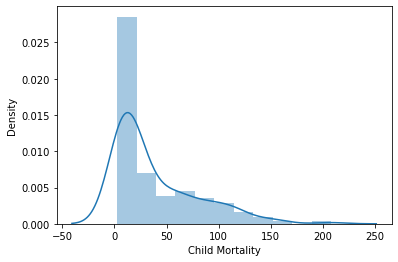

In [13]:
sns.distplot(data['child_mort'])
plt.xlabel('Child Mortality')
plt.show()

In [16]:
data[['country', 'child_mort']].sort_values(by= 'child_mort', ascending=False).head(10)

,country,child_mort
66,Haiti,208.0
132,Sierra Leone,160.0
32,Chad,150.0
31,Central African Republic,149.0
97,Mali,137.0
113,Nigeria,130.0
112,Niger,123.0
3,Angola,119.0
25,Burkina Faso,116.0
37,"Congo, Dem. Rep.",116.0


In [18]:
(len(data[data['child_mort']> 100])/data.shape[0])*100

10.179640718562874

Only 10 % countries have child mortality rate greater than 100.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


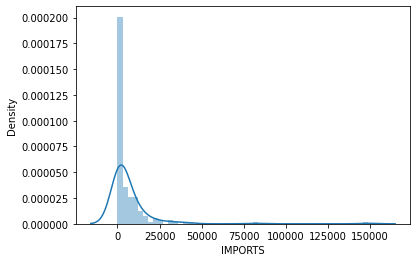

In [19]:
sns.distplot(data['imports'])
plt.xlabel('IMPORTS')
plt.show()

In [22]:
(len(data[data['imports'] >25000])/data.shape[0])*100

5.389221556886228

In [23]:
data[data['imports'] >25000]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000
98,Malta,6.8,32283.0,1825.15,32494.0,28300,3.830,80.3,1.36,21100
110,Netherlands,4.5,36216.0,5985.70,31990.8,45500,0.848,80.7,1.79,50300
114,Norway,3.2,34856.6,8323.44,25023.0,62300,5.950,81.0,1.95,87800
133,Singapore,2.8,93200.0,1845.36,81084.0,72100,-0.046,82.7,1.15,46600
145,Switzerland,4.5,47744.0,8579.00,39761.8,55500,0.317,82.2,1.52,74600


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


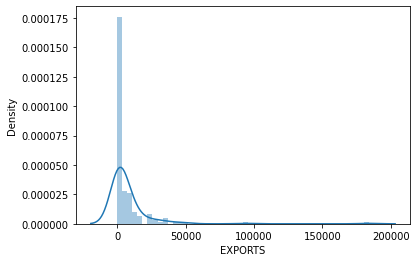

In [24]:
sns.distplot(data['exports'])
plt.xlabel('EXPORTS')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


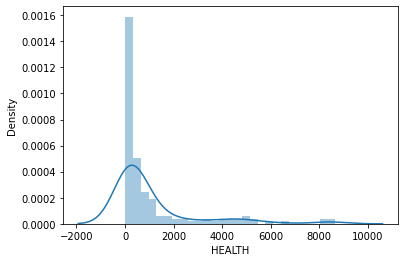

In [25]:
sns.distplot(data['health'])
plt.xlabel('HEALTH')
plt.show()

In [26]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


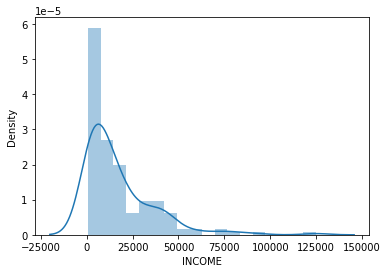

In [27]:
sns.distplot(data['income'])
plt.xlabel('INCOME')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


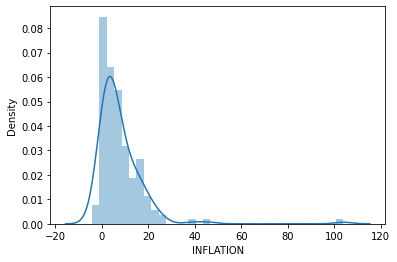

In [28]:
sns.distplot(data['inflation'])
plt.xlabel('INFLATION')
plt.show()

In [29]:
data[data.inflation> 20]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.4,60.1,6.16,3530
5,Argentina,14.5,1946.700,834.3000,1648.000,18700,20.9,75.8,2.37,10300
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609,20.8,57.5,6.54,334
38,"Congo, Rep.",63.9,2331.740,67.4040,1498.780,5190,20.7,60.4,4.95,2740
49,Equatorial Guinea,111.0,14671.800,766.0800,10071.900,33700,24.9,60.9,5.21,17100
103,Mongolia,26.1,1237.550,144.1600,1502.550,7710,39.2,66.2,2.64,2650
113,Nigeria,130.0,589.490,118.1310,405.420,5150,104.0,60.5,5.84,2330
140,Sri Lanka,11.2,550.760,82.6140,753.080,8560,22.8,74.4,2.20,2810
149,Timor-Leste,62.6,79.200,328.3200,1000.800,1850,26.5,71.1,6.23,3600
163,Venezuela,17.1,3847.500,662.8500,2376.000,16500,45.9,75.4,2.47,13500


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


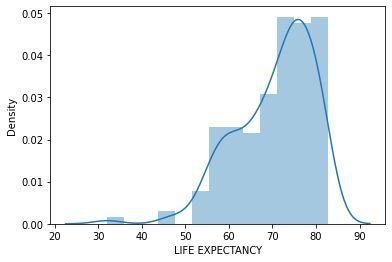

In [30]:
sns.distplot(data['life_expec'])
plt.xlabel('LIFE EXPECTANCY')
plt.show()

In [31]:
data[data.life_expec < 50]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662
87,Lesotho,99.7,460.980,129.8700,1181.700,2380,4.15,46.5,3.30,1170


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


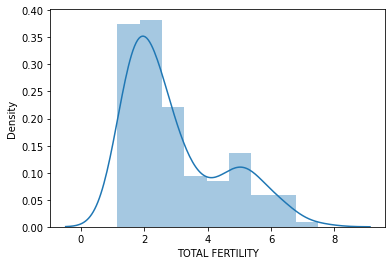

In [32]:
sns.distplot(data['total_fer'])
plt.xlabel('TOTAL FERTILITY')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


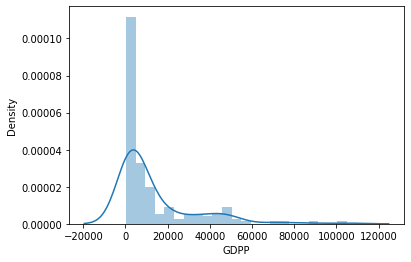

In [33]:
sns.distplot(data['gdpp'])
plt.xlabel("GDPP")
plt.show()

### Bivariate Analysis

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [35]:
num_cols= data.select_dtypes(include= ['int64', 'float64']).columns
num_cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

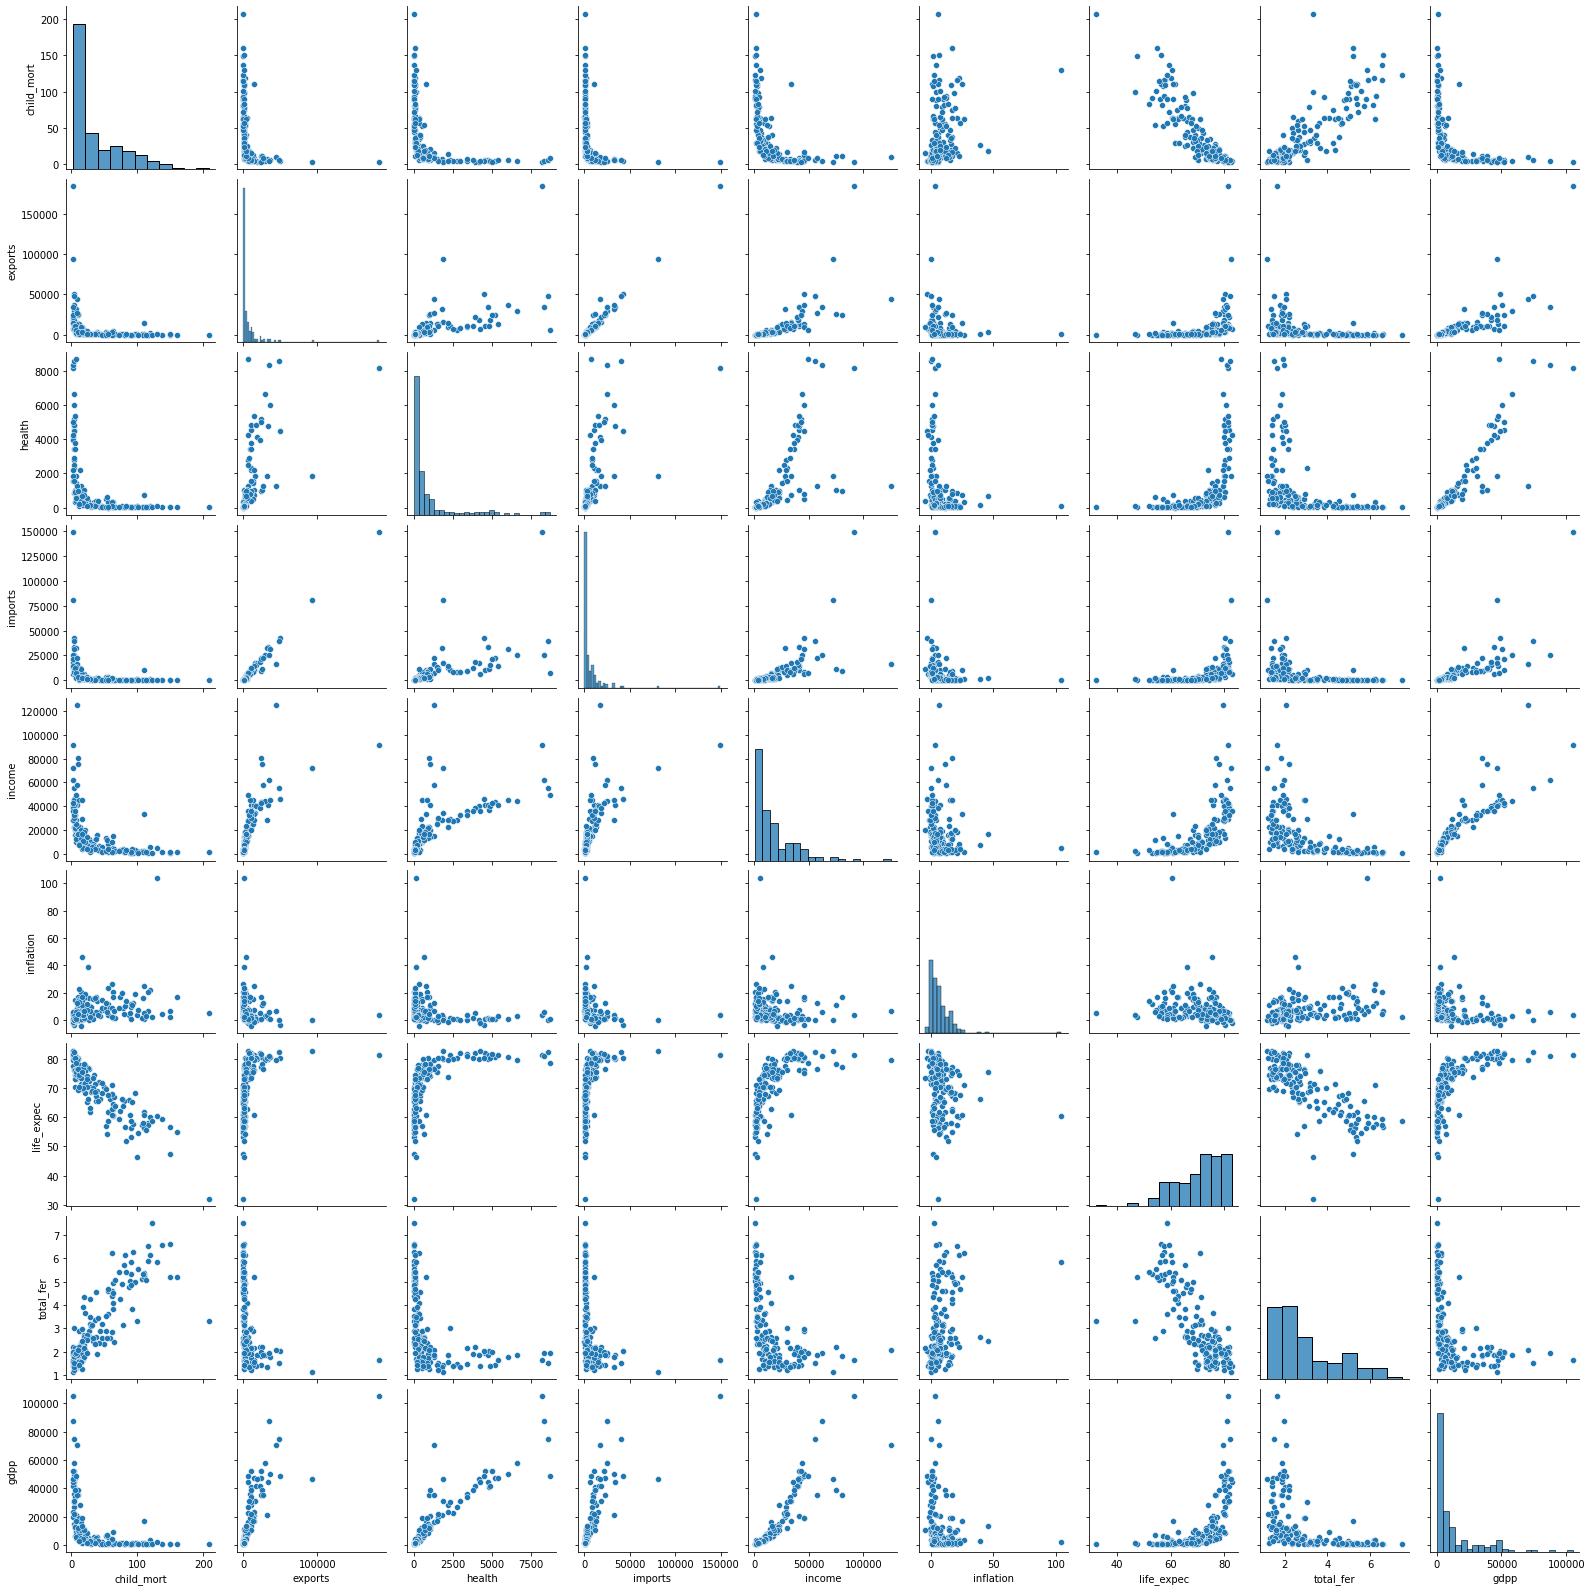

In [36]:
sns.pairplot(data[num_cols])
plt.show()

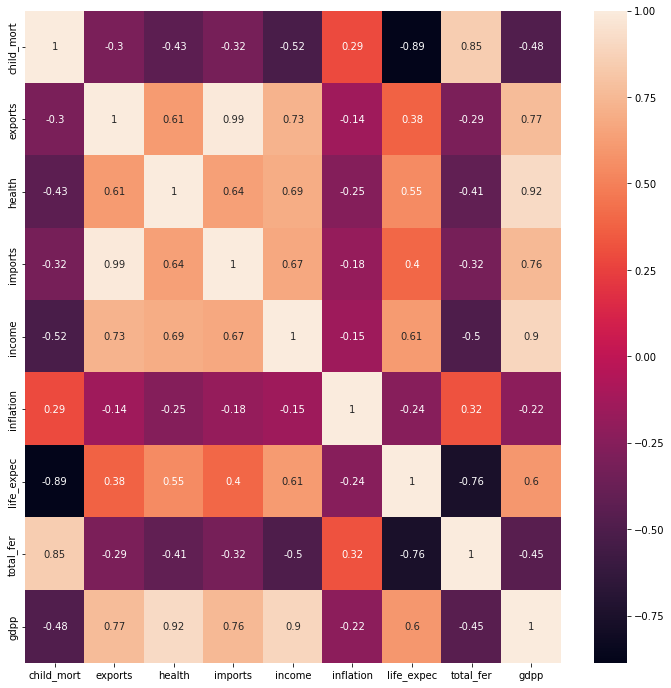

In [39]:

plt.figure(figsize=(12,12))
sns.heatmap(data[num_cols].corr(), annot=True)
plt.show()

### Outlier Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


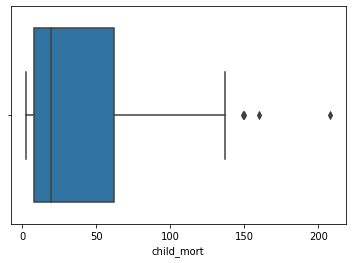

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


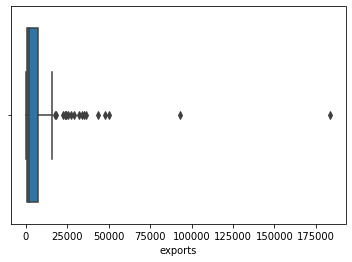

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


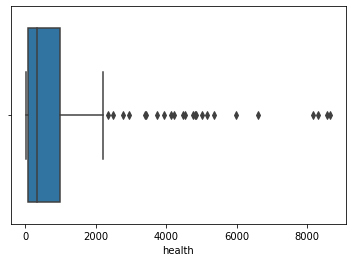

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


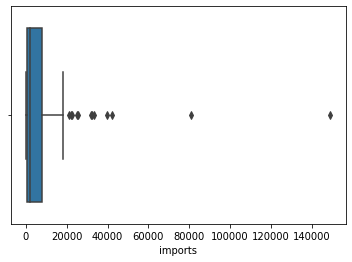

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


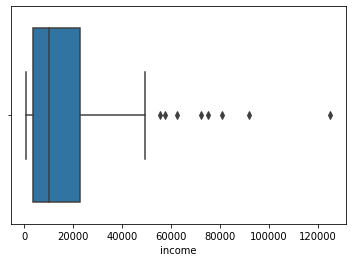

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


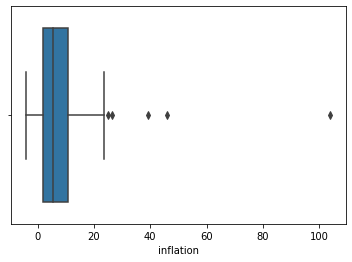

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


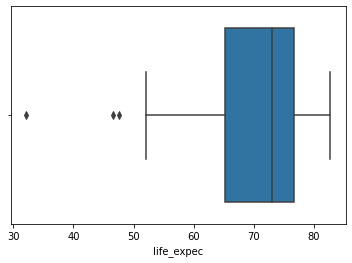

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


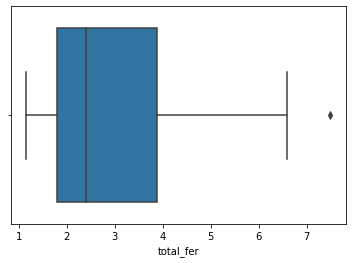

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


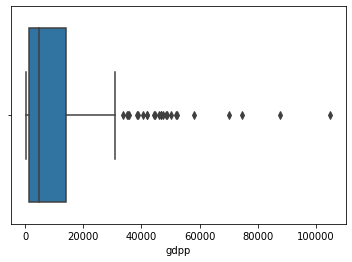

In [40]:
for col in data[num_cols].columns:
  sns.boxplot(data[col])
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


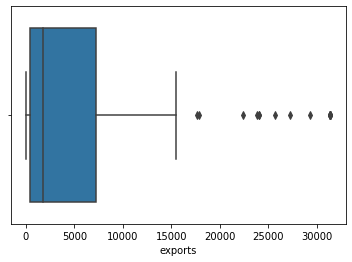

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


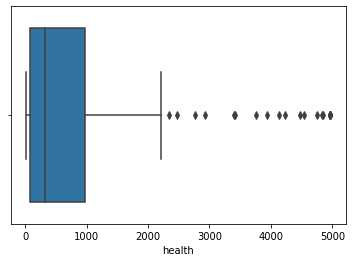

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


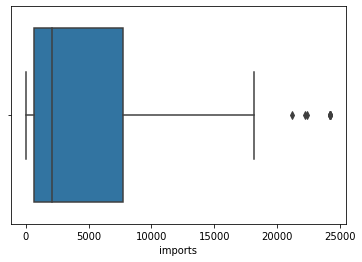

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


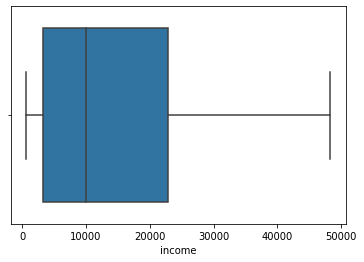

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


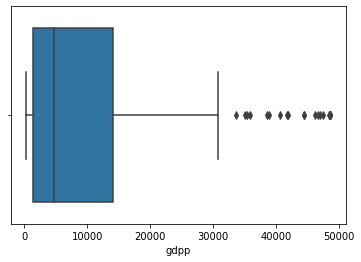

In [41]:
#Capping the higher range outliers using soft capping
for col in ['exports', 'health', 'imports', 'income', 'gdpp']:
    Q= data[col].quantile(0.95)
    data[col][data[col]>=Q]= Q
    sns.boxplot(data[col])
    plt.show()

## Standardisation

In [42]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scale= scaler.fit_transform(data[num_cols])
df_scaled= pd.DataFrame(scale)
df_scaled.columns= num_cols
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.669581,-0.629435,-0.732729,-0.958349,0.157336,-1.619092,1.902882,-0.757362
1,-0.538949,-0.542172,-0.473489,-0.472182,-0.394006,-0.312347,0.647866,-0.859973,-0.523321
2,-0.272833,-0.475838,-0.530017,-0.560152,-0.192552,0.789274,0.670423,-0.038404,-0.498838
3,2.007808,-0.418960,-0.588935,-0.543087,-0.667360,1.387054,-1.179234,2.128151,-0.560376
4,-0.695634,-0.027134,-0.150685,0.306422,0.227992,-0.601749,0.704258,-0.541946,0.013312


In [43]:
df_scaled.index= data['country']
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.291532,-0.669581,-0.629435,-0.732729,-0.958349,0.157336,-1.619092,1.902882,-0.757362
Albania,-0.538949,-0.542172,-0.473489,-0.472182,-0.394006,-0.312347,0.647866,-0.859973,-0.523321
Algeria,-0.272833,-0.475838,-0.530017,-0.560152,-0.192552,0.789274,0.670423,-0.038404,-0.498838
Angola,2.007808,-0.418960,-0.588935,-0.543087,-0.667360,1.387054,-1.179234,2.128151,-0.560376
Antigua and Barbuda,-0.695634,-0.027134,-0.150685,0.306422,0.227992,-0.601749,0.704258,-0.541946,0.013312


## K-Means

In [44]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [45]:
hopkins(df_scaled)

0.9016907779737754

#### Approx 90% dissimilarity measured by Hopkins method. 

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Determining best value for 'K' using SSD and 'Silhouette Score'.

For n_cluster= 2, the silhouette score is 0.4937743544278973
For n_cluster= 3, the silhouette score is 0.43488766272527113
For n_cluster= 4, the silhouette score is 0.4344775132295822
For n_cluster= 5, the silhouette score is 0.40831122941281806
For n_cluster= 6, the silhouette score is 0.3209987311147981
For n_cluster= 7, the silhouette score is 0.3202287316412945
For n_cluster= 8, the silhouette score is 0.3195151189467493
For n_cluster= 9, the silhouette score is 0.3000028320600683
For n_cluster= 10, the silhouette score is 0.27038313480410664


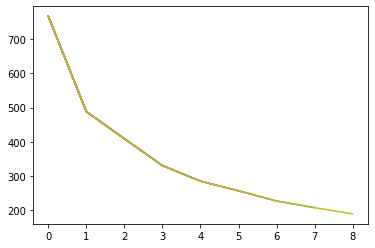

In [51]:
ssd= []
k_range= [2,3,4,5,6,7,8,9,10]
for i in k_range:
  kmeans= KMeans(n_clusters=i, max_iter=500)
  kmeans.fit(df_scaled)
  ssd.append(kmeans.inertia_)
  plt.plot(ssd)

  cluster_labels= kmeans.labels_
  sil_score= silhouette_score(df_scaled, cluster_labels)
  print("For n_cluster= {0}, the silhouette score is {1}".format(i, sil_score))

Choosing k as 2

In [53]:
kmeans= KMeans(n_clusters= 3, max_iter=500)
kmeans.fit(df_scaled)

data['k_means_id']= kmeans.labels_
data.set_index('country', inplace=True)
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_id
country,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,2
Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,1
Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,1
Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,2
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,1


In [54]:
data['k_means_id'].value_counts()

1    85
2    45
0    37
Name: k_means_id, dtype: int64

### Clusters Visualization

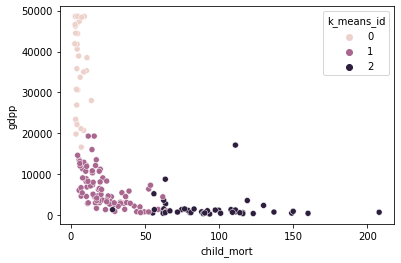

In [56]:
sns.scatterplot(data= data, x= 'child_mort', y= 'gdpp', hue= 'k_means_id')
plt.show()

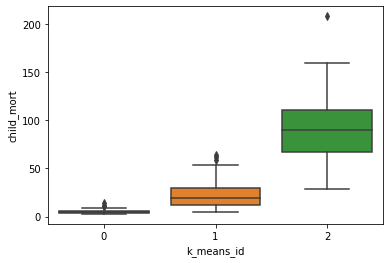

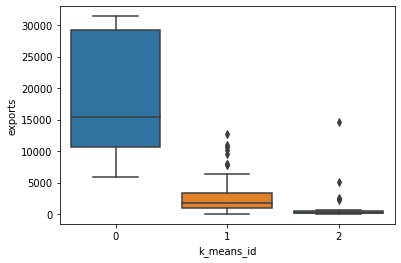

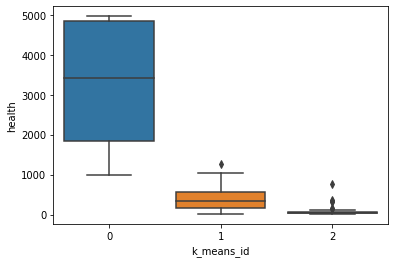

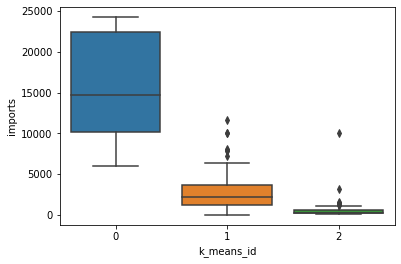

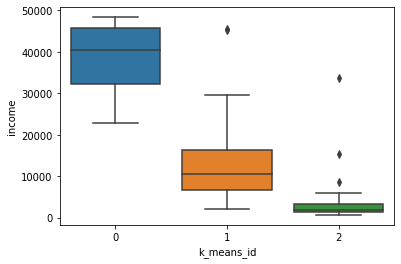

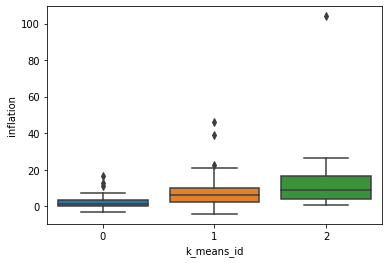

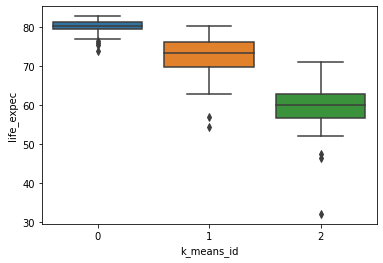

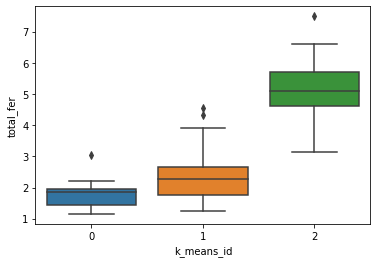

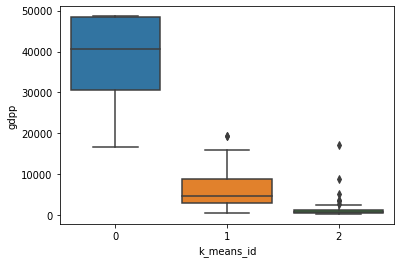

In [58]:
for col in data.columns:
  if col != 'k_means_id':
    sns.boxplot(data= data, x= 'k_means_id', y= col)
    plt.show()

### Cluster id= 2 seems to be the countries with low gdpp, income, exports and high total fertility, child mortality rate, etc.

In [61]:
data[data['k_means_id']==2].sort_values(by= ['gdpp', 'child_mort', 'income'], ascending= [True, False, True]).head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_id
country,,,,,,,,,,
Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231,2
Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327,2
"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334,2
Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348,2
Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399,2
Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.60,413,2
Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419,2
Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446,2
Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459,2


## The countries which are in direst aid are- 
* Burundi
* Liberia
* Congo, Dem. Rep.
* Niger
* Sierra Leone
* Madagascar
* Mozambique
* Central African Republic
* Malawi
* Eritea